# Machine Learning with scikit-learn

#### Background to Machine Learning:

- ML = giving computers ability to learn to make decisions from data without being explicitly programmed. Example: computer learn to predict span emails from not spam emails. Here we are trying to predict a particular class label i.e. spam or not spam - this is supervised learning.
 
- unsupervised learning = no labels present i.e. ecommerce companies can cluster/group their users into multiple segments based on their past purchases - that is send customers SMS about television appliances for those who have previously bought a similar product rather than send an SMS to all users. 

- Reinforcement learning = machiens or software agents interact with an envirnment. For example, cars equiped with visual sensors to learn about their surrounding environment for self-driving cars. Or scanners to understand and interpet text.

#### Supervised Learning Tasks:

 - we have several data points or samples from a data set
 - this comprises of Y (dependent variable) and X's (independent variables)
 - aim = build a model that is able to predict the dependent variable Y
 - get lebelled data by collection historical data, which already has labels, or conduct experiements such as A/B testing to get labelled data i.e. new web design to improve no: people checkout - 50% web users see new deisign vs 50% old web design. 
 
#### Classifciation or Regression Problems
 - Learning task = CLASSIFICATION if Y = predicting spam or not spam (email filter example) or Y = predicting profit, break even or loss (stock market example).
 - Learning task = REGRESSION if Y = predicting price of house (given its features / attributes) or Y = predicting BMI given X attributes such as avg. daily exercise, height, sex etc. 
 - Regression problems = continous varibales
 - Classification problems = variables containing categories

## 1. Classification

### Numerical EDA
Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. For a refresher on the importance of EDA, check out the first two chapters of Statistical Thinking in Python (Part 1).

In [1]:
import pandas as pd 

#import and refine dataset column names
df=  pd.read_csv('house-votes-84.data', sep="," , header = None) # reading csv files
df.rename(columns = {0: 'Party',1:'infants', 2:'water', 3:'budget', 4: 'physician', 5:'salvador', #create the column names
      6:'religious', 7:'satellite', 8:'aid', 9:'missile', 10:'immigration', 11:'synfuels',
       12:'education', 13:'superfund', 14:'crime', 15:'duty_free_exports', 16:'eaa_rsa' 
    }, inplace = True)

#replace data values in df as scikit-learn API must have continous data for the features X
df = df.replace({'y': 1, 'n': 0, '?':0}) 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

### Visual EDA

You may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

Given on the right is a countplot of the 'education' bill, generated from the following code:

    plt.figure()
    sns.countplot(x='education', hue='party', data=df, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()

In sns.countplot(), we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlaid onto the same figure.


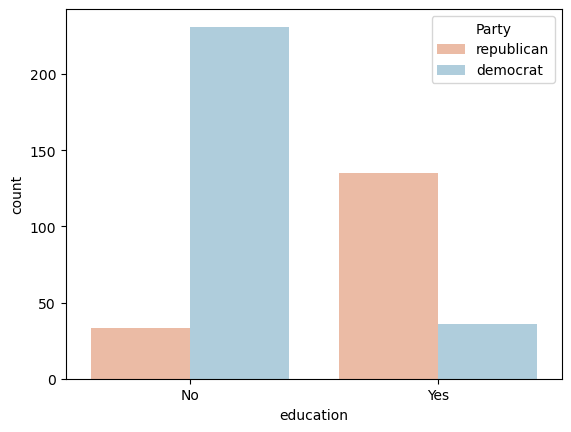

In [2]:
# Import seaborn
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x='education', hue='Party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

([<matplotlib.axis.XTick at 0x15c942110>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

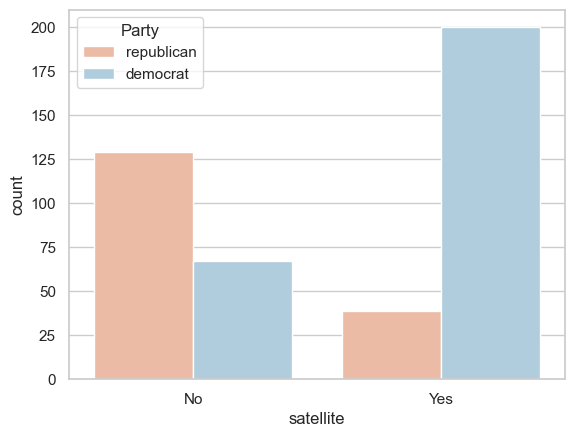

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure()
sns.countplot(data = df, x= "satellite", hue='Party', palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x15c9b22d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

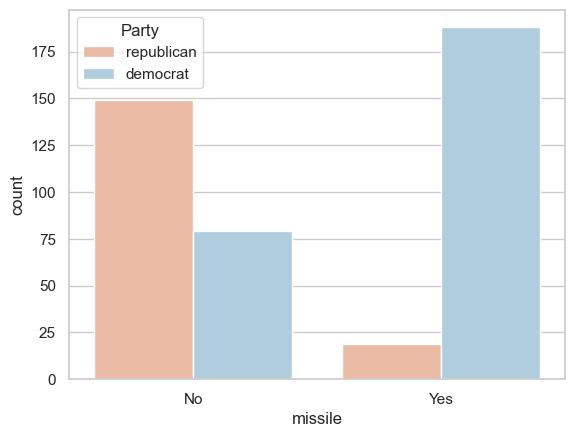

In [4]:
plt.figure()
sns.countplot(data = df, x= "missile", hue='Party', palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])

both democrats and republicans voted in favour of the bill for satalite and missiles

### k-Nearest Neighbors: Fit

- KNN = is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset.

Importance of ensuring your data adheres to the format required by the scikit-learn API. 
- The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. 
- The target needs to be a single column with the same number of observations as the feature data. 
- The feature array X and response variable y: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called df.

In [5]:
from IPython.display import Image
Image(url = "https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.complex-narrative-s-retina.ts=1653407890466.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative/items/content_group/image")

In [6]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['Party'].values #response variable y = Party
X = df.drop('Party', axis=1).values #feature array (explanatory variables)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X,y)

print(X.shape) #435 obs of 16 features
print(y.shape) #target/response variable needs to be a single vector of the same no: rows

(435, 16)
(435,)


### k-Nearest Neighbors: Predict
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [7]:
# add a random unlabelled datapoint which will be used to predict the label (democrat or republican) given the existing training datapoint
# i.e. 1 being yes and 0 being no - here data is random so not quite 1 or 0 to test based on these vots for each features is the person likely to vote democrat or republican 
my_dict = {0:0.696469, 1:0.286139, 2:0.226851, 3:0.551315, 4:0.719469, 5:0.423106, 6:0.980764, \
          7:0.68483, 8:0.480932, 9:0.392118, 10:0.343178 ,11:0.72905, 12:0.438572, 13:0.059678, \
          14:0.398044, 15:0.737995}
X_new = pd.DataFrame([my_dict]) # wrapping your dictionary into a list
print(X_new)

         0         1         2         3         4         5         6   \
0  0.696469  0.286139  0.226851  0.551315  0.719469  0.423106  0.980764   

        7         8         9         10       11        12        13  \
0  0.68483  0.480932  0.392118  0.343178  0.72905  0.438572  0.059678   

         14        15  
0  0.398044  0.737995  


Note: scikit-learni API require:
        
- data as NP array or pandas df
- features take on continous values (numerical data)
- no missing values

In [8]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier #this is the classifier type

# Create arrays for the features (X) and the target variable (Y)
y = df['Party'].values # features / labels (democrat/republican)
X = df.drop('Party', axis=1).values #feature array (training data)

# Create a k-NN classifier with 6 neighbors: knn i.e. looking at the 6 earest neighbours to determine what label the unlabelled datapoint should be
knn = KNeighborsClassifier(n_neighbors = 6) 

# Fit the classifier to the training set X, the labelled data
# pass in the features as np array and labels/target as np array
knn.fit(X,y)

# Predict the labels for the training data X 
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


AttributeError: 'Flags' object has no attribute 'c_contiguous'

### The digits recognition dataset
Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: which is a stored dataset in sklearn
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

#### Question) How well our model will perform on new data?
- split data into test and training set
- train data is used to fit the ML model i.e. classifier knn 
- compute accuracy of the predictions using the test dataset

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #randomly splits data into train and test

# Create feature and target arrays
X = digits.data
y = digits.target

# Create stratified training and test sets using 0.2 (20% proportion) for the size of the test set. Use a random state of 42 (sets seed from random num generator). 
# note: setting seed with same arguement laater will allow to reproduce exact split and downstream results.
# Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
# if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0 's and 75% of 1 's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Compute and print the accuracy of the classifier's predictions using the .score() method.
print(knn.score(X_test, y_test)) #98% accurate


### Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

In [ ]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## 2. Regression

### Which of the following is a regression problem?
Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.

 - A bike share company using time and weather data to predict the number of bikes being rented at any given hour.

### Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [ ]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('Gapminder.csv')

# Create array X for the 'fertility' feature and array y for the 'life' target variable.
y = df['life'].values
X = df['fertility'].values #here features is only fertility 

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape the arrays by using the .reshape() method and passing in -1 and 1
# this is the desired shape for regression
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

### Exploring the Gapminder data
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

    sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Once you have a feel for the data, consider the statements below and select the one that is not true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!



 Choose one of the possible incorrect sattements

 - DF has 139 samples and 9 cols - true
 - life and fertility are negatively correlated - true
 - mean of life is 69.602878 - true
 - fertility is of type int 64 - false
 - GDP and life are positvely correlated - true

In [ ]:
print(df.info())
print(df.head())
print(df.describe())
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

### Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the coefficient of determination score using scikit-learn .scor() method.

In [ ]:
# scatter plot
scat = sns.scatterplot(x="fertility",
                    y="life",
                    data=df)

# add label to the axis and label to the plot
scat.set(ylabel = 'Life Expectancy', title = 'Correlation Between Life Expectancy and fertility')

In [ ]:
plt.style.use('ggplot')

y = df['life'].values
X = df.drop('life', axis=1) #drop explanatory variable 'life' from df

print(y)
print(X)
# need to Reshape to 1-D
y = y.reshape(-1, 1) # to column vector
X_fertility = X['fertility'].values.reshape(-1, 1) #same here

_ = plt.scatter(X['fertility'], y, color='blue') # _ = used in the interactive interpreter to store the result of the last evaluation
_ = plt.ylabel('Life Expectancy')
_ = plt.xlabel('Fertility')

# -----------------------
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space over the range of data i.e. over min and max of fertility
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data as a linear regression i.e. y=a+Bx
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

### Train/test split for regression
In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the 
 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Read the CSV file into a DataFrame: df
df = pd.read_csv('Gapminder.csv')

y = df['life'].values #drop explanatory variable 'life' from df
X = df.drop(['life', 'Region'], axis=1) #drop variable we want to test and region as its string data type

y = y.reshape(-1, 1) # to column vector
X_fertility = X['fertility'].values.reshape(-1, 1) #same here

# Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

### Cross Validation

Flaw for previous regression exercise = computing R-sqr on test set means R sqr is dependent on the way you split the data.
Solution - cross validation:

_______________

Example here is 5 fold cross validation:
 - split dataset into 5 groups
 - make first group as test set
 - fit our model with remaining four groups
 - predict on test set
 - compute the metric of interest
 - make second group as test set
 - fit on remianing data
 - predict on test set
 - compute the metric of interest
 - ......
 - make nth group the test set
 - etc...
 
Here we get 5 values of R sqr and compute stats of interest i.e. mean/median/95% conf intervals.

Trade-off using more folds = computationally expensive.

### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In [ ]:
#load the X and y (life) arrays
X = df.drop(['life', 'Region'], axis=1).values
y = df['life'].values

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
# ave 5 fold score is around 86% so 86% of model explained by features variable 14% contianed in error/unexplined features

### K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

n the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

    %timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))


In [ ]:
%timeit cross_val_score(reg, X, y, cv = 3)

In [ ]:
%timeit cross_val_score(reg, X, y, cv = 10)

### Regression Background in ML

- data fitting = plot series of data points and drawing line of best fit
- best fit = find all necessary patterns in the data and avoid random data points (noise)

Overfitting = If we allow our machine learning model to look at the data too many times, it will find a lot of patterns in our data, including the ones which are unnecessary. It will learn really well on the test dataset and fit very well to it. It will learn important patterns,  but it will also learn from the noise in our data and will not be able to predict on other datasets.

Underfitting = Conversely, in a scenario where the model has not been allowed to look at our data a sufficient number of times, the model won’t be able to find patterns in our test dataset. It will not fit properly to our test dataset and fail to perform on new data too. 

Bias = algorithm has limited flexibility to learn from data. Such models pay very little attention to the training data and oversimplify the model therefore the validation error or prediction error and training error follow similar trends. Such models always lead to a high error on training and test data. High Bias causes underfitting in our model.

High Variance = pays a lot of attention to training data and does not generalize therefore the validation error or prediction error are far apart from each other. Such models usually perform very well on training data but have high error rates on test data. High Variance causes overfitting in our model.

Optimal = which the model is sensitive to the pattern in our model, but at the same time can generalize to new data. This happens when Bias and Variance are both optimal. We call this Bias-Variance Tradeoff and we can achieve it in over or under fitted models by using Regression.

### Regularization in Machine Learning

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

In [ ]:
Image(url = "https://www.simplilearn.com/ice9/free_resources_article_thumb/regularization.JPG")

There are two main types of regularization techniques: 
_______
1. Ridge Regularization
- modifies the over-fitted or under fitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.
- Loss function = OLS + alpha*sum(sqr coefficient values)
- A low alpha (constant) value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.
_______
2. Lasso Regression
- Loss function = OLS+alpha*sum(absolute values of the magnitude of coefficients)
- Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

### Regularization I: Lasso
In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.



In [ ]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('Gapminder.csv')

# drop select columns from df
df_columns = df.drop(['life', 'Region'], axis=1).columns
print(df_columns)

#create X and y
X = df.drop(['life', 'Region'], axis=1).values
y = df['life'].values

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
lasso = Lasso(alpha = 0.4, normalize=True)

# Fit the regressor to the data and compute the coefficients using the coef_ attribute.
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


### Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2  norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R sqrd  scores for each, using this function that we have defined for you, which plots the R sqrd score as well as standard error for each alpha:

The motivation behind this exercise is for you to see how the R sqrd score varies with different alphas, and to understand the importance of selecting the right value for alpha


In [ ]:
# function defined for Ridge Rgression
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha_space[0]
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

#can see the R sqr value dosen't change accross different alpha levels as indicated by uniform line

## 3. Fine Tuning your Model

### How good is your model?

Accuracy isn't always desirable: 

- consider spam classification problem in which 99% of emails are real and only 1% span. I could build a model that classifies all emails as real and model wil be 99% accurate.
- Class imbalance = The situation when 1 class is more frequent that the other
- Draw a confusion 2x2 matrix that sums predictive performance for spam problem

In [ ]:
from IPython.display import Image
Image(filename = 'confusion matrix.png')

True Positive:

- Predicted = Spam, Actually = Spam.

True Negative:

- Predicted = Real, Actually = Real.

False Positive: (Type 1 Error)

- Predicted = Spam, Actually = Real.

False Negative: (Type 2 Error)

- Predicted = Real, Actually = Spam.

___________
From the confusiion matrix you can calculate:

 - Precision = TP/TP+FP
 - Recall (sensitivity) = TP/TP+FN
 - F1 score = 2*((Precision * Recall)/(Precision + Recall)) >>> this is the harmonic mean between the precision and recall
 
High precision = classifier had low false positive rate (not many real actual emails when preciting Spam.

High recall = classifier predicted mostly positive or spam correctly (TP)

### Metrics for classification
Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [ ]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#import dataset
df = pd.read_csv('diabetes.csv')
#print(df.head())

#rename df columns:
df.columns = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes']
#print(df.head())

#create X and y feature and target arrays respectively
X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values

# Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


### Logistic Regression and ROC Curve

You’ve built your machine learning model – so what’s next? You need to evaluate and validate how good (or bad) it is, so you can decide whether to implement it. That’s where the AUC-ROC curve comes in.

Area Under the Curve” (AUC) and “Receiver Operating Characteristic” (ROC) helps us visualize how well our machine learning classifier performs.

A machine learning classification model can be used to directly predict the data point’s actual class or predict its probability of belonging to different classes. 

We can determine our own threshold to interpret the result of the classifier.

Setting different thresholds for classifying positive classes for data points will inadvertently change the Sensitivity and Specificity of the model. And one of these thresholds will probably give a better result than the others, depending on whether we are aiming to lower the number of False Negatives or False Positives.

The metrics change with the changing threshold values. 

ROC curve = shows how well a classification model performs. It helps us see how the model makes decisions at different levels of certainty. The curve has two lines: one for how often the model correctly identifies positive cases (true positives) and another for how often it mistakenly identifies negative cases as positive (false positives).

The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative ones. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

In [ ]:
Image(url = "https://av-eks-blogoptimized.s3.amazonaws.com/AUC342913.jpg")

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning that the classifier either predicts a random class or a constant class for all the data points.

So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

In [ ]:
Image(url = "https://av-eks-blogoptimized.s3.amazonaws.com/AUC240057.jpg")

### Building a logistic regression model
Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!



In [ ]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


### Plotting an ROC curve
most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Precision-recall Curve
When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds.

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes.

In [ ]:
Image(url='data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+CjwhRE9DVFlQRSBzdmcgUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj4KPCEtLSBDcmVhdGVkIHdpdGggbWF0cGxvdGxpYiAoaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pIC0tPgo8c3ZnIGhlaWdodD0iMzIwcHQiIHZlcnNpb249IjEuMSIgdmlld0JveD0iMCAwIDMyMCAzMjAiIHdpZHRoPSIzMjBwdCIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiB4bWxuczp4bGluaz0iaHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayI+CiA8bWV0YWRhdGE+CiAgPHJkZjpSREYgeG1sbnM6Y2M9Imh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICA8Y2M6V29yaz4KICAgIDxkYzp0eXBlIHJkZjpyZXNvdXJjZT0iaHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UiLz4KICAgIDxkYzpkYXRlPjIwMjMtMDktMjBUMjM6MDc6MzMuNzEyMTE4PC9kYzpkYXRlPgogICAgPGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+CiAgICA8ZGM6Y3JlYXRvcj4KICAgICA8Y2M6QWdlbnQ+CiAgICAgIDxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPgogICAgIDwvY2M6QWdlbnQ+CiAgICA8L2RjOmNyZWF0b3I+CiAgIDwvY2M6V29yaz4KICA8L3JkZjpSREY+CiA8L21ldGFkYXRhPgogPGRlZnM+CiAgPHN0eWxlIHR5cGU9InRleHQvY3NzIj4qe3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOnJvdW5kO308L3N0eWxlPgogPC9kZWZzPgogPGcgaWQ9ImZpZ3VyZV8xIj4KICA8ZyBpZD0icGF0Y2hfMSI+CiAgIDxwYXRoIGQ9Ik0gMCAzMjAgCkwgMzIwIDMyMCAKTCAzMjAgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDojZmZmZmZmOyIvPgogIDwvZz4KICA8ZyBpZD0iYXhlc18xIj4KICAgPGcgaWQ9InBhdGNoXzIiPgogICAgPHBhdGggZD0iTSA0Ny4zODEyNSAyNzguODQzNzUgCkwgMzA5LjIgMjc4Ljg0Mzc1IApMIDMwOS4yIDI1LjkxODEyNSAKTCA0Ny4zODEyNSAyNS45MTgxMjUgCnoKIiBzdHlsZT0iZmlsbDojZmZmZmZmOyIvPgogICA8L2c+CiAgIDxnIGlkPSJtYXRwbG90bGliLmF4aXNfMSI+CiAgICA8ZyBpZD0ieHRpY2tfMSI+CiAgICAgPGcgaWQ9ImxpbmUyZF8xIj4KICAgICAgPGRlZnM+CiAgICAgICA8cGF0aCBkPSJNIDAgMCAKTCAwIDMuNSAKIiBpZD0ibTE0ODY2ODlhMzMiIHN0eWxlPSJzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC44OyIvPgogICAgICA8L2RlZnM+CiAgICAgIDxnPgogICAgICAgPHVzZSBzdHlsZT0ic3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuODsiIHg9IjU5LjI4MjEwMiIgeGxpbms6aHJlZj0iI20xNDg2Njg5YTMzIiB5PSIyNzguODQzNzUiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgICA8ZyBpZD0idGV4dF8xIj4KICAgICAgPCEtLSAwLjAgLS0+CiAgICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDUxLjMzMDU0IDI5My40NDIxODcpc2NhbGUoMC4xIC0wLjEpIj4KICAgICAgIDxkZWZzPgogICAgICAgIDxwYXRoIGQ9Ik0gMzEuNzgxMjUgNjYuNDA2MjUgClEgMjQuMTcxODc1IDY2LjQwNjI1IDIwLjMyODEyNSA1OC45MDYyNSAKUSAxNi41IDUxLjQyMTg3NSAxNi41IDM2LjM3NSAKUSAxNi41IDIxLjM5MDYyNSAyMC4zMjgxMjUgMTMuODkwNjI1IApRIDI0LjE3MTg3NSA2LjM5MDYyNSAzMS43ODEyNSA2LjM5MDYyNSAKUSAzOS40NTMxMjUgNi4zOTA2MjUgNDMuMjgxMjUgMTMuODkwNjI1IApRIDQ3LjEyNSAyMS4zOTA2MjUgNDcuMTI1IDM2LjM3NSAKUSA0Ny4xMjUgNTEuNDIxODc1IDQzLjI4MTI1IDU4LjkwNjI1IApRIDM5LjQ1MzEyNSA2Ni40MDYyNSAzMS43ODEyNSA2Ni40MDYyNSAKegpNIDMxLjc4MTI1IDc0LjIxODc1IApRIDQ0LjA0Njg3NSA3NC4yMTg3NSA1MC41MTU2MjUgNjQuNTE1NjI1IApRIDU2Ljk4NDM3NSA1NC44MjgxMjUgNTYuOTg0Mzc1IDM2LjM3NSAKUSA1Ni45ODQzNzUgMTcuOTY4NzUgNTAuNTE1NjI1IDguMjY1NjI1IApRIDQ0LjA0Njg3NSAtMS40MjE4NzUgMzEuNzgxMjUgLTEuNDIxODc1IApRIDE5LjUzMTI1IC0xLjQyMTg3NSAxMy4wNjI1IDguMjY1NjI1IApRIDYuNTkzNzUgMTcuOTY4NzUgNi41OTM3NSAzNi4zNzUgClEgNi41OTM3NSA1NC44MjgxMjUgMTMuMDYyNSA2NC41MTU2MjUgClEgMTkuNTMxMjUgNzQuMjE4NzUgMzEuNzgxMjUgNzQuMjE4NzUgCnoKIiBpZD0iRGVqYVZ1U2Fucy00OCIvPgogICAgICAgIDxwYXRoIGQ9Ik0gMTAuNjg3NSAxMi40MDYyNSAKTCAyMSAxMi40MDYyNSAKTCAyMSAwIApMIDEwLjY4NzUgMCAKegoiIGlkPSJEZWphVnVTYW5zLTQ2Ii8+CiAgICAgICA8L2RlZnM+CiAgICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ4Ii8+CiAgICAgICA8dXNlIHg9IjYzLjYyMzA0NyIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDYiLz4KICAgICAgIDx1c2UgeD0iOTUuNDEwMTU2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00OCIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgPC9nPgogICAgPGcgaWQ9Inh0aWNrXzIiPgogICAgIDxnIGlkPSJsaW5lMmRfMiI+CiAgICAgIDxnPgogICAgICAgPHVzZSBzdHlsZT0ic3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuODsiIHg9IjEwNi44ODU1MTEiIHhsaW5rOmhyZWY9IiNtMTQ4NjY4OWEzMyIgeT0iMjc4Ljg0Mzc1Ii8+CiAgICAgIDwvZz4KICAgICA8L2c+CiAgICAgPGcgaWQ9InRleHRfMiI+CiAgICAgIDwhLS0gMC4yIC0tPgogICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSg5OC45MzM5NDkgMjkzLjQ0MjE4NylzY2FsZSgwLjEgLTAuMSkiPgogICAgICAgPGRlZnM+CiAgICAgICAgPHBhdGggZD0iTSAxOS4xODc1IDguMjk2ODc1IApMIDUzLjYwOTM3NSA4LjI5Njg3NSAKTCA1My42MDkzNzUgMCAKTCA3LjMyODEyNSAwIApMIDcuMzI4MTI1IDguMjk2ODc1IApRIDEyLjkzNzUgMTQuMTA5Mzc1IDIyLjYyNSAyMy44OTA2MjUgClEgMzIuMzI4MTI1IDMzLjY4NzUgMzQuODEyNSAzNi41MzEyNSAKUSAzOS41NDY4NzUgNDEuODQzNzUgNDEuNDIxODc1IDQ1LjUzMTI1IApRIDQzLjMxMjUgNDkuMjE4NzUgNDMuMzEyNSA1Mi43ODEyNSAKUSA0My4zMTI1IDU4LjU5Mzc1IDM5LjIzNDM3NSA2Mi4yNSAKUSAzNS4xNTYyNSA2NS45MjE4NzUgMjguNjA5Mzc1IDY1LjkyMTg3NSAKUSAyMy45Njg3NSA2NS45MjE4NzUgMTguODEyNSA2NC4zMTI1IApRIDEzLjY3MTg3NSA2Mi43MDMxMjUgNy44MTI1IDU5LjQyMTg3NSAKTCA3LjgxMjUgNjkuMzkwNjI1IApRIDEzLjc2NTYyNSA3MS43ODEyNSAxOC45Mzc1IDczIApRIDI0LjEyNSA3NC4yMTg3NSAyOC40MjE4NzUgNzQuMjE4NzUgClEgMzkuNzUgNzQuMjE4NzUgNDYuNDg0Mzc1IDY4LjU0Njg3NSAKUSA1My4yMTg3NSA2Mi44OTA2MjUgNTMuMjE4NzUgNTMuNDIxODc1IApRIDUzLjIxODc1IDQ4LjkyMTg3NSA1MS41MzEyNSA0NC44OTA2MjUgClEgNDkuODU5Mzc1IDQwLjg3NSA0NS40MDYyNSAzNS40MDYyNSAKUSA0NC4xODc1IDMzLjk4NDM3NSAzNy42NDA2MjUgMjcuMjE4NzUgClEgMzEuMTA5Mzc1IDIwLjQ1MzEyNSAxOS4xODc1IDguMjk2ODc1IAp6CiIgaWQ9IkRlamFWdVNhbnMtNTAiLz4KICAgICAgIDwvZGVmcz4KICAgICAgIDx1c2UgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDgiLz4KICAgICAgIDx1c2UgeD0iNjMuNjIzMDQ3IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00NiIvPgogICAgICAgPHVzZSB4PSI5NS40MTAxNTYiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTUwIi8+CiAgICAgIDwvZz4KICAgICA8L2c+CiAgICA8L2c+CiAgICA8ZyBpZD0ieHRpY2tfMyI+CiAgICAgPGcgaWQ9ImxpbmUyZF8zIj4KICAgICAgPGc+CiAgICAgICA8dXNlIHN0eWxlPSJzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC44OyIgeD0iMTU0LjQ4ODkyIiB4bGluazpocmVmPSIjbTE0ODY2ODlhMzMiIHk9IjI3OC44NDM3NSIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgIDxnIGlkPSJ0ZXh0XzMiPgogICAgICA8IS0tIDAuNCAtLT4KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ2LjUzNzM1OCAyOTMuNDQyMTg3KXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8ZGVmcz4KICAgICAgICA8cGF0aCBkPSJNIDM3Ljc5Njg3NSA2NC4zMTI1IApMIDEyLjg5MDYyNSAyNS4zOTA2MjUgCkwgMzcuNzk2ODc1IDI1LjM5MDYyNSAKegpNIDM1LjIwMzEyNSA3Mi45MDYyNSAKTCA0Ny42MDkzNzUgNzIuOTA2MjUgCkwgNDcuNjA5Mzc1IDI1LjM5MDYyNSAKTCA1OC4wMTU2MjUgMjUuMzkwNjI1IApMIDU4LjAxNTYyNSAxNy4xODc1IApMIDQ3LjYwOTM3NSAxNy4xODc1IApMIDQ3LjYwOTM3NSAwIApMIDM3Ljc5Njg3NSAwIApMIDM3Ljc5Njg3NSAxNy4xODc1IApMIDQuODkwNjI1IDE3LjE4NzUgCkwgNC44OTA2MjUgMjYuNzAzMTI1IAp6CiIgaWQ9IkRlamFWdVNhbnMtNTIiLz4KICAgICAgIDwvZGVmcz4KICAgICAgIDx1c2UgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDgiLz4KICAgICAgIDx1c2UgeD0iNjMuNjIzMDQ3IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00NiIvPgogICAgICAgPHVzZSB4PSI5NS40MTAxNTYiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTUyIi8+CiAgICAgIDwvZz4KICAgICA8L2c+CiAgICA8L2c+CiAgICA8ZyBpZD0ieHRpY2tfNCI+CiAgICAgPGcgaWQ9ImxpbmUyZF80Ij4KICAgICAgPGc+CiAgICAgICA8dXNlIHN0eWxlPSJzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC44OyIgeD0iMjAyLjA5MjMzIiB4bGluazpocmVmPSIjbTE0ODY2ODlhMzMiIHk9IjI3OC44NDM3NSIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgIDxnIGlkPSJ0ZXh0XzQiPgogICAgICA8IS0tIDAuNiAtLT4KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTk0LjE0MDc2NyAyOTMuNDQyMTg3KXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8ZGVmcz4KICAgICAgICA8cGF0aCBkPSJNIDMzLjAxNTYyNSA0MC4zNzUgClEgMjYuMzc1IDQwLjM3NSAyMi40ODQzNzUgMzUuODI4MTI1IApRIDE4LjYwOTM3NSAzMS4yOTY4NzUgMTguNjA5Mzc1IDIzLjM5MDYyNSAKUSAxOC42MDkzNzUgMTUuNTMxMjUgMjIuNDg0Mzc1IDEwLjk1MzEyNSAKUSAyNi4zNzUgNi4zOTA2MjUgMzMuMDE1NjI1IDYuMzkwNjI1IApRIDM5LjY1NjI1IDYuMzkwNjI1IDQzLjUzMTI1IDEwLjk1MzEyNSAKUSA0Ny40MDYyNSAxNS41MzEyNSA0Ny40MDYyNSAyMy4zOTA2MjUgClEgNDcuNDA2MjUgMzEuMjk2ODc1IDQzLjUzMTI1IDM1LjgyODEyNSAKUSAzOS42NTYyNSA0MC4zNzUgMzMuMDE1NjI1IDQwLjM3NSAKegpNIDUyLjU5Mzc1IDcxLjI5Njg3NSAKTCA1Mi41OTM3NSA2Mi4zMTI1IApRIDQ4Ljg3NSA2NC4wNjI1IDQ1LjA5Mzc1IDY0Ljk4NDM3NSAKUSA0MS4zMTI1IDY1LjkyMTg3NSAzNy41OTM3NSA2NS45MjE4NzUgClEgMjcuODI4MTI1IDY1LjkyMTg3NSAyMi42NzE4NzUgNTkuMzI4MTI1IApRIDE3LjUzMTI1IDUyLjczNDM3NSAxNi43OTY4NzUgMzkuNDA2MjUgClEgMTkuNjcxODc1IDQzLjY1NjI1IDI0LjAxNTYyNSA0NS45MjE4NzUgClEgMjguMzc1IDQ4LjE4NzUgMzMuNTkzNzUgNDguMTg3NSAKUSA0NC41NzgxMjUgNDguMTg3NSA1MC45NTMxMjUgNDEuNTE1NjI1IApRIDU3LjMyODEyNSAzNC44NTkzNzUgNTcuMzI4MTI1IDIzLjM5MDYyNSAKUSA1Ny4zMjgxMjUgMTIuMTU2MjUgNTAuNjg3NSA1LjM1OTM3NSAKUSA0NC4wNDY4NzUgLTEuNDIxODc1IDMzLjAxNTYyNSAtMS40MjE4NzUgClEgMjAuMzU5Mzc1IC0xLjQyMTg3NSAxMy42NzE4NzUgOC4yNjU2MjUgClEgNi45ODQzNzUgMTcuOTY4NzUgNi45ODQzNzUgMzYuMzc1IApRIDYuOTg0Mzc1IDUzLjY1NjI1IDE1LjE4NzUgNjMuOTM3NSAKUSAyMy4zOTA2MjUgNzQuMjE4NzUgMzcuMjAzMTI1IDc0LjIxODc1IApRIDQwLjkyMTg3NSA3NC4yMTg3NSA0NC43MDMxMjUgNzMuNDg0Mzc1IApRIDQ4LjQ4NDM3NSA3Mi43NSA1Mi41OTM3NSA3MS4yOTY4NzUgCnoKIiBpZD0iRGVqYVZ1U2Fucy01NCIvPgogICAgICAgPC9kZWZzPgogICAgICAgPHVzZSB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00OCIvPgogICAgICAgPHVzZSB4PSI2My42MjMwNDciIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ2Ii8+CiAgICAgICA8dXNlIHg9Ijk1LjQxMDE1NiIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNTQiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgIDwvZz4KICAgIDxnIGlkPSJ4dGlja181Ij4KICAgICA8ZyBpZD0ibGluZTJkXzUiPgogICAgICA8Zz4KICAgICAgIDx1c2Ugc3R5bGU9InN0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjg7IiB4PSIyNDkuNjk1NzM5IiB4bGluazpocmVmPSIjbTE0ODY2ODlhMzMiIHk9IjI3OC44NDM3NSIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgIDxnIGlkPSJ0ZXh0XzUiPgogICAgICA8IS0tIDAuOCAtLT4KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQxLjc0NDE3NiAyOTMuNDQyMTg3KXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8ZGVmcz4KICAgICAgICA8cGF0aCBkPSJNIDMxLjc4MTI1IDM0LjYyNSAKUSAyNC43NSAzNC42MjUgMjAuNzE4NzUgMzAuODU5Mzc1IApRIDE2LjcwMzEyNSAyNy4wOTM3NSAxNi43MDMxMjUgMjAuNTE1NjI1IApRIDE2LjcwMzEyNSAxMy45MjE4NzUgMjAuNzE4NzUgMTAuMTU2MjUgClEgMjQuNzUgNi4zOTA2MjUgMzEuNzgxMjUgNi4zOTA2MjUgClEgMzguODEyNSA2LjM5MDYyNSA0Mi44NTkzNzUgMTAuMTcxODc1IApRIDQ2LjkyMTg3NSAxMy45Njg3NSA0Ni45MjE4NzUgMjAuNTE1NjI1IApRIDQ2LjkyMTg3NSAyNy4wOTM3NSA0Mi44OTA2MjUgMzAuODU5Mzc1IApRIDM4Ljg3NSAzNC42MjUgMzEuNzgxMjUgMzQuNjI1IAp6Ck0gMjEuOTIxODc1IDM4LjgxMjUgClEgMTUuNTc4MTI1IDQwLjM3NSAxMi4wMzEyNSA0NC43MTg3NSAKUSA4LjUgNDkuMDc4MTI1IDguNSA1NS4zMjgxMjUgClEgOC41IDY0LjA2MjUgMTQuNzE4NzUgNjkuMTQwNjI1IApRIDIwLjk1MzEyNSA3NC4yMTg3NSAzMS43ODEyNSA3NC4yMTg3NSAKUSA0Mi42NzE4NzUgNzQuMjE4NzUgNDguODc1IDY5LjE0MDYyNSAKUSA1NS4wNzgxMjUgNjQuMDYyNSA1NS4wNzgxMjUgNTUuMzI4MTI1IApRIDU1LjA3ODEyNSA0OS4wNzgxMjUgNTEuNTMxMjUgNDQuNzE4NzUgClEgNDggNDAuMzc1IDQxLjcwMzEyNSAzOC44MTI1IApRIDQ4LjgyODEyNSAzNy4xNTYyNSA1Mi43OTY4NzUgMzIuMzEyNSAKUSA1Ni43ODEyNSAyNy40ODQzNzUgNTYuNzgxMjUgMjAuNTE1NjI1IApRIDU2Ljc4MTI1IDkuOTA2MjUgNTAuMzEyNSA0LjIzNDM3NSAKUSA0My44NDM3NSAtMS40MjE4NzUgMzEuNzgxMjUgLTEuNDIxODc1IApRIDE5LjczNDM3NSAtMS40MjE4NzUgMTMuMjUgNC4yMzQzNzUgClEgNi43ODEyNSA5LjkwNjI1IDYuNzgxMjUgMjAuNTE1NjI1IApRIDYuNzgxMjUgMjcuNDg0Mzc1IDEwLjc4MTI1IDMyLjMxMjUgClEgMTQuNzk2ODc1IDM3LjE1NjI1IDIxLjkyMTg3NSAzOC44MTI1IAp6Ck0gMTguMzEyNSA1NC4zOTA2MjUgClEgMTguMzEyNSA0OC43MzQzNzUgMjEuODQzNzUgNDUuNTYyNSAKUSAyNS4zOTA2MjUgNDIuMzkwNjI1IDMxLjc4MTI1IDQyLjM5MDYyNSAKUSAzOC4xNDA2MjUgNDIuMzkwNjI1IDQxLjcxODc1IDQ1LjU2MjUgClEgNDUuMzEyNSA0OC43MzQzNzUgNDUuMzEyNSA1NC4zOTA2MjUgClEgNDUuMzEyNSA2MC4wNjI1IDQxLjcxODc1IDYzLjIzNDM3NSAKUSAzOC4xNDA2MjUgNjYuNDA2MjUgMzEuNzgxMjUgNjYuNDA2MjUgClEgMjUuMzkwNjI1IDY2LjQwNjI1IDIxLjg0Mzc1IDYzLjIzNDM3NSAKUSAxOC4zMTI1IDYwLjA2MjUgMTguMzEyNSA1NC4zOTA2MjUgCnoKIiBpZD0iRGVqYVZ1U2Fucy01NiIvPgogICAgICAgPC9kZWZzPgogICAgICAgPHVzZSB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00OCIvPgogICAgICAgPHVzZSB4PSI2My42MjMwNDciIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ2Ii8+CiAgICAgICA8dXNlIHg9Ijk1LjQxMDE1NiIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNTYiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgIDwvZz4KICAgIDxnIGlkPSJ4dGlja182Ij4KICAgICA8ZyBpZD0ibGluZTJkXzYiPgogICAgICA8Zz4KICAgICAgIDx1c2Ugc3R5bGU9InN0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjg7IiB4PSIyOTcuMjk5MTQ4IiB4bGluazpocmVmPSIjbTE0ODY2ODlhMzMiIHk9IjI3OC44NDM3NSIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgIDxnIGlkPSJ0ZXh0XzYiPgogICAgICA8IS0tIDEuMCAtLT4KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjg5LjM0NzU4NSAyOTMuNDQyMTg3KXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8ZGVmcz4KICAgICAgICA8cGF0aCBkPSJNIDEyLjQwNjI1IDguMjk2ODc1IApMIDI4LjUxNTYyNSA4LjI5Njg3NSAKTCAyOC41MTU2MjUgNjMuOTIxODc1IApMIDEwLjk4NDM3NSA2MC40MDYyNSAKTCAxMC45ODQzNzUgNjkuMzkwNjI1IApMIDI4LjQyMTg3NSA3Mi45MDYyNSAKTCAzOC4yODEyNSA3Mi45MDYyNSAKTCAzOC4yODEyNSA4LjI5Njg3NSAKTCA1NC4zOTA2MjUgOC4yOTY4NzUgCkwgNTQuMzkwNjI1IDAgCkwgMTIuNDA2MjUgMCAKegoiIGlkPSJEZWphVnVTYW5zLTQ5Ii8+CiAgICAgICA8L2RlZnM+CiAgICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ5Ii8+CiAgICAgICA8dXNlIHg9IjYzLjYyMzA0NyIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDYiLz4KICAgICAgIDx1c2UgeD0iOTUuNDEwMTU2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00OCIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgPC9nPgogICAgPGcgaWQ9InRleHRfNyI+CiAgICAgPCEtLSBSZWNhbGwgLS0+CiAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTYzLjM3MzQzNyAzMDcuMTIwMzEzKXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgIDxkZWZzPgogICAgICAgPHBhdGggZD0iTSA0NC4zOTA2MjUgMzQuMTg3NSAKUSA0Ny41NjI1IDMzLjEwOTM3NSA1MC41NjI1IDI5LjU5Mzc1IApRIDUzLjU2MjUgMjYuMDc4MTI1IDU2LjU5Mzc1IDE5LjkyMTg3NSAKTCA2Ni42MDkzNzUgMCAKTCA1NiAwIApMIDQ2LjY4NzUgMTguNzAzMTI1IApRIDQzLjA2MjUgMjYuMDMxMjUgMzkuNjcxODc1IDI4LjQyMTg3NSAKUSAzNi4yODEyNSAzMC44MTI1IDMwLjQyMTg3NSAzMC44MTI1IApMIDE5LjY3MTg3NSAzMC44MTI1IApMIDE5LjY3MTg3NSAwIApMIDkuODEyNSAwIApMIDkuODEyNSA3Mi45MDYyNSAKTCAzMi4wNzgxMjUgNzIuOTA2MjUgClEgNDQuNTc4MTI1IDcyLjkwNjI1IDUwLjczNDM3NSA2Ny42NzE4NzUgClEgNTYuODkwNjI1IDYyLjQ1MzEyNSA1Ni44OTA2MjUgNTEuOTA2MjUgClEgNTYuODkwNjI1IDQ1LjAxNTYyNSA1My42ODc1IDQwLjQ2ODc1IApRIDUwLjQ4NDM3NSAzNS45Mzc1IDQ0LjM5MDYyNSAzNC4xODc1IAp6Ck0gMTkuNjcxODc1IDY0Ljc5Njg3NSAKTCAxOS42NzE4NzUgMzguOTIxODc1IApMIDMyLjA3ODEyNSAzOC45MjE4NzUgClEgMzkuMjAzMTI1IDM4LjkyMTg3NSA0Mi44NDM3NSA0Mi4yMTg3NSAKUSA0Ni40ODQzNzUgNDUuNTE1NjI1IDQ2LjQ4NDM3NSA1MS45MDYyNSAKUSA0Ni40ODQzNzUgNTguMjk2ODc1IDQyLjg0Mzc1IDYxLjU0Njg3NSAKUSAzOS4yMDMxMjUgNjQuNzk2ODc1IDMyLjA3ODEyNSA2NC43OTY4NzUgCnoKIiBpZD0iRGVqYVZ1U2Fucy04MiIvPgogICAgICAgPHBhdGggZD0iTSA1Ni4yMDMxMjUgMjkuNTkzNzUgCkwgNTYuMjAzMTI1IDI1LjIwMzEyNSAKTCAxNC44OTA2MjUgMjUuMjAzMTI1IApRIDE1LjQ4NDM3NSAxNS45MjE4NzUgMjAuNDg0Mzc1IDExLjA2MjUgClEgMjUuNDg0Mzc1IDYuMjAzMTI1IDM0LjQyMTg3NSA2LjIwMzEyNSAKUSAzOS41OTM3NSA2LjIwMzEyNSA0NC40NTMxMjUgNy40Njg3NSAKUSA0OS4zMTI1IDguNzM0Mzc1IDU0LjEwOTM3NSAxMS4yODEyNSAKTCA1NC4xMDkzNzUgMi43ODEyNSAKUSA0OS4yNjU2MjUgMC43MzQzNzUgNDQuMTg3NSAtMC4zNDM3NSAKUSAzOS4xMDkzNzUgLTEuNDIxODc1IDMzLjg5MDYyNSAtMS40MjE4NzUgClEgMjAuNzk2ODc1IC0xLjQyMTg3NSAxMy4xNTYyNSA2LjE4NzUgClEgNS41MTU2MjUgMTMuODEyNSA1LjUxNTYyNSAyNi44MTI1IApRIDUuNTE1NjI1IDQwLjIzNDM3NSAxMi43NjU2MjUgNDguMTA5Mzc1IApRIDIwLjAxNTYyNSA1NiAzMi4zMjgxMjUgNTYgClEgNDMuMzU5Mzc1IDU2IDQ5Ljc4MTI1IDQ4Ljg5MDYyNSAKUSA1Ni4yMDMxMjUgNDEuNzk2ODc1IDU2LjIwMzEyNSAyOS41OTM3NSAKegpNIDQ3LjIxODc1IDMyLjIzNDM3NSAKUSA0Ny4xMjUgMzkuNTkzNzUgNDMuMDkzNzUgNDMuOTg0Mzc1IApRIDM5LjA2MjUgNDguMzkwNjI1IDMyLjQyMTg3NSA0OC4zOTA2MjUgClEgMjQuOTA2MjUgNDguMzkwNjI1IDIwLjM5MDYyNSA0NC4xNDA2MjUgClEgMTUuODc1IDM5Ljg5MDYyNSAxNS4xODc1IDMyLjE3MTg3NSAKegoiIGlkPSJEZWphVnVTYW5zLTEwMSIvPgogICAgICAgPHBhdGggZD0iTSA0OC43ODEyNSA1Mi41OTM3NSAKTCA0OC43ODEyNSA0NC4xODc1IApRIDQ0Ljk2ODc1IDQ2LjI5Njg3NSA0MS4xNDA2MjUgNDcuMzQzNzUgClEgMzcuMzEyNSA0OC4zOTA2MjUgMzMuNDA2MjUgNDguMzkwNjI1IApRIDI0LjY1NjI1IDQ4LjM5MDYyNSAxOS44MTI1IDQyLjg0Mzc1IApRIDE0Ljk4NDM3NSAzNy4zMTI1IDE0Ljk4NDM3NSAyNy4yOTY4NzUgClEgMTQuOTg0Mzc1IDE3LjI4MTI1IDE5LjgxMjUgMTEuNzM0Mzc1IApRIDI0LjY1NjI1IDYuMjAzMTI1IDMzLjQwNjI1IDYuMjAzMTI1IApRIDM3LjMxMjUgNi4yMDMxMjUgNDEuMTQwNjI1IDcuMjUgClEgNDQuOTY4NzUgOC4yOTY4NzUgNDguNzgxMjUgMTAuNDA2MjUgCkwgNDguNzgxMjUgMi4wOTM3NSAKUSA0NS4wMTU2MjUgMC4zNDM3NSA0MC45ODQzNzUgLTAuNTMxMjUgClEgMzYuOTY4NzUgLTEuNDIxODc1IDMyLjQyMTg3NSAtMS40MjE4NzUgClEgMjAuMDYyNSAtMS40MjE4NzUgMTIuNzgxMjUgNi4zNDM3NSAKUSA1LjUxNTYyNSAxNC4xMDkzNzUgNS41MTU2MjUgMjcuMjk2ODc1IApRIDUuNTE1NjI1IDQwLjY3MTg3NSAxMi44NTkzNzUgNDguMzI4MTI1IApRIDIwLjIxODc1IDU2IDMzLjAxNTYyNSA1NiAKUSAzNy4xNTYyNSA1NiA0MS4xMDkzNzUgNTUuMTQwNjI1IApRIDQ1LjA2MjUgNTQuMjk2ODc1IDQ4Ljc4MTI1IDUyLjU5Mzc1IAp6CiIgaWQ9IkRlamFWdVNhbnMtOTkiLz4KICAgICAgIDxwYXRoIGQ9Ik0gMzQuMjgxMjUgMjcuNDg0Mzc1IApRIDIzLjM5MDYyNSAyNy40ODQzNzUgMTkuMTg3NSAyNSAKUSAxNC45ODQzNzUgMjIuNTE1NjI1IDE0Ljk4NDM3NSAxNi41IApRIDE0Ljk4NDM3NSAxMS43MTg3NSAxOC4xNDA2MjUgOC45MDYyNSAKUSAyMS4yOTY4NzUgNi4xMDkzNzUgMjYuNzAzMTI1IDYuMTA5Mzc1IApRIDM0LjE4NzUgNi4xMDkzNzUgMzguNzAzMTI1IDExLjQwNjI1IApRIDQzLjIxODc1IDE2LjcwMzEyNSA0My4yMTg3NSAyNS40ODQzNzUgCkwgNDMuMjE4NzUgMjcuNDg0Mzc1IAp6Ck0gNTIuMjAzMTI1IDMxLjIwMzEyNSAKTCA1Mi4yMDMxMjUgMCAKTCA0My4yMTg3NSAwIApMIDQzLjIxODc1IDguMjk2ODc1IApRIDQwLjE0MDYyNSAzLjMyODEyNSAzNS41NDY4NzUgMC45NTMxMjUgClEgMzAuOTUzMTI1IC0xLjQyMTg3NSAyNC4zMTI1IC0xLjQyMTg3NSAKUSAxNS45MjE4NzUgLTEuNDIxODc1IDEwLjk1MzEyNSAzLjI5Njg3NSAKUSA2IDguMDE1NjI1IDYgMTUuOTIxODc1IApRIDYgMjUuMTQwNjI1IDEyLjE3MTg3NSAyOS44MjgxMjUgClEgMTguMzU5Mzc1IDM0LjUxNTYyNSAzMC42MDkzNzUgMzQuNTE1NjI1IApMIDQzLjIxODc1IDM0LjUxNTYyNSAKTCA0My4yMTg3NSAzNS40MDYyNSAKUSA0My4yMTg3NSA0MS42MDkzNzUgMzkuMTQwNjI1IDQ1IApRIDM1LjA2MjUgNDguMzkwNjI1IDI3LjY4NzUgNDguMzkwNjI1IApRIDIzIDQ4LjM5MDYyNSAxOC41NDY4NzUgNDcuMjY1NjI1IApRIDE0LjEwOTM3NSA0Ni4xNDA2MjUgMTAuMDE1NjI1IDQzLjg5MDYyNSAKTCAxMC4wMTU2MjUgNTIuMjAzMTI1IApRIDE0LjkzNzUgNTQuMTA5Mzc1IDE5LjU3ODEyNSA1NS4wNDY4NzUgClEgMjQuMjE4NzUgNTYgMjguNjA5Mzc1IDU2IApRIDQwLjQ4NDM3NSA1NiA0Ni4zNDM3NSA0OS44NDM3NSAKUSA1Mi4yMDMxMjUgNDMuNzAzMTI1IDUyLjIwMzEyNSAzMS4yMDMxMjUgCnoKIiBpZD0iRGVqYVZ1U2Fucy05NyIvPgogICAgICAgPHBhdGggZD0iTSA5LjQyMTg3NSA3NS45ODQzNzUgCkwgMTguNDA2MjUgNzUuOTg0Mzc1IApMIDE4LjQwNjI1IDAgCkwgOS40MjE4NzUgMCAKegoiIGlkPSJEZWphVnVTYW5zLTEwOCIvPgogICAgICA8L2RlZnM+CiAgICAgIDx1c2UgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtODIiLz4KICAgICAgPHVzZSB4PSI2NC45ODI0MjIiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTEwMSIvPgogICAgICA8dXNlIHg9IjEyNi41MDU4NTkiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTk5Ii8+CiAgICAgIDx1c2UgeD0iMTgxLjQ4NjMyOCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtOTciLz4KICAgICAgPHVzZSB4PSIyNDIuNzY1NjI1IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMDgiLz4KICAgICAgPHVzZSB4PSIyNzAuNTQ4ODI4IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMDgiLz4KICAgICA8L2c+CiAgICA8L2c+CiAgIDwvZz4KICAgPGcgaWQ9Im1hdHBsb3RsaWIuYXhpc18yIj4KICAgIDxnIGlkPSJ5dGlja18xIj4KICAgICA8ZyBpZD0ibGluZTJkXzciPgogICAgICA8ZGVmcz4KICAgICAgIDxwYXRoIGQ9Ik0gMCAwIApMIC0zLjUgMCAKIiBpZD0ibTM4OTBiODFhOWQiIHN0eWxlPSJzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC44OyIvPgogICAgICA8L2RlZnM+CiAgICAgIDxnPgogICAgICAgPHVzZSBzdHlsZT0ic3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuODsiIHg9IjQ3LjM4MTI1IiB4bGluazpocmVmPSIjbTM4OTBiODFhOWQiIHk9IjI1Ni41MjY3ODMiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgICA8ZyBpZD0idGV4dF84Ij4KICAgICAgPCEtLSAwLjQgLS0+CiAgICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0LjQ3ODEyNSAyNjAuMzI2MDAyKXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ4Ii8+CiAgICAgICA8dXNlIHg9IjYzLjYyMzA0NyIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDYiLz4KICAgICAgIDx1c2UgeD0iOTUuNDEwMTU2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy01MiIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgPC9nPgogICAgPGcgaWQ9Inl0aWNrXzIiPgogICAgIDxnIGlkPSJsaW5lMmRfOCI+CiAgICAgIDxnPgogICAgICAgPHVzZSBzdHlsZT0ic3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuODsiIHg9IjQ3LjM4MTI1IiB4bGluazpocmVmPSIjbTM4OTBiODFhOWQiIHk9IjIyMC4wMDgxMSIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgIDxnIGlkPSJ0ZXh0XzkiPgogICAgICA8IS0tIDAuNSAtLT4KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQuNDc4MTI1IDIyMy44MDczMjkpc2NhbGUoMC4xIC0wLjEpIj4KICAgICAgIDxkZWZzPgogICAgICAgIDxwYXRoIGQ9Ik0gMTAuNzk2ODc1IDcyLjkwNjI1IApMIDQ5LjUxNTYyNSA3Mi45MDYyNSAKTCA0OS41MTU2MjUgNjQuNTkzNzUgCkwgMTkuODI4MTI1IDY0LjU5Mzc1IApMIDE5LjgyODEyNSA0Ni43MzQzNzUgClEgMjEuOTY4NzUgNDcuNDY4NzUgMjQuMTA5Mzc1IDQ3LjgyODEyNSAKUSAyNi4yNjU2MjUgNDguMTg3NSAyOC40MjE4NzUgNDguMTg3NSAKUSA0MC42MjUgNDguMTg3NSA0Ny43NSA0MS41IApRIDU0Ljg5MDYyNSAzNC44MTI1IDU0Ljg5MDYyNSAyMy4zOTA2MjUgClEgNTQuODkwNjI1IDExLjYyNSA0Ny41NjI1IDUuMDkzNzUgClEgNDAuMjM0Mzc1IC0xLjQyMTg3NSAyNi45MDYyNSAtMS40MjE4NzUgClEgMjIuMzEyNSAtMS40MjE4NzUgMTcuNTQ2ODc1IC0wLjY0MDYyNSAKUSAxMi43OTY4NzUgMC4xNDA2MjUgNy43MTg3NSAxLjcwMzEyNSAKTCA3LjcxODc1IDExLjYyNSAKUSAxMi4xMDkzNzUgOS4yMzQzNzUgMTYuNzk2ODc1IDguMDYyNSAKUSAyMS40ODQzNzUgNi44OTA2MjUgMjYuNzAzMTI1IDYuODkwNjI1IApRIDM1LjE1NjI1IDYuODkwNjI1IDQwLjA3ODEyNSAxMS4zMjgxMjUgClEgNDUuMDE1NjI1IDE1Ljc2NTYyNSA0NS4wMTU2MjUgMjMuMzkwNjI1IApRIDQ1LjAxNTYyNSAzMSA0MC4wNzgxMjUgMzUuNDM3NSAKUSAzNS4xNTYyNSAzOS44OTA2MjUgMjYuNzAzMTI1IDM5Ljg5MDYyNSAKUSAyMi43NSAzOS44OTA2MjUgMTguODEyNSAzOS4wMTU2MjUgClEgMTQuODkwNjI1IDM4LjE0MDYyNSAxMC43OTY4NzUgMzYuMjgxMjUgCnoKIiBpZD0iRGVqYVZ1U2Fucy01MyIvPgogICAgICAgPC9kZWZzPgogICAgICAgPHVzZSB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00OCIvPgogICAgICAgPHVzZSB4PSI2My42MjMwNDciIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ2Ii8+CiAgICAgICA8dXNlIHg9Ijk1LjQxMDE1NiIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNTMiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgIDwvZz4KICAgIDxnIGlkPSJ5dGlja18zIj4KICAgICA8ZyBpZD0ibGluZTJkXzkiPgogICAgICA8Zz4KICAgICAgIDx1c2Ugc3R5bGU9InN0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjg7IiB4PSI0Ny4zODEyNSIgeGxpbms6aHJlZj0iI20zODkwYjgxYTlkIiB5PSIxODMuNDg5NDM3Ii8+CiAgICAgIDwvZz4KICAgICA8L2c+CiAgICAgPGcgaWQ9InRleHRfMTAiPgogICAgICA8IS0tIDAuNiAtLT4KICAgICAgPGcgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQuNDc4MTI1IDE4Ny4yODg2NTYpc2NhbGUoMC4xIC0wLjEpIj4KICAgICAgIDx1c2UgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDgiLz4KICAgICAgIDx1c2UgeD0iNjMuNjIzMDQ3IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00NiIvPgogICAgICAgPHVzZSB4PSI5NS40MTAxNTYiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTU0Ii8+CiAgICAgIDwvZz4KICAgICA8L2c+CiAgICA8L2c+CiAgICA8ZyBpZD0ieXRpY2tfNCI+CiAgICAgPGcgaWQ9ImxpbmUyZF8xMCI+CiAgICAgIDxnPgogICAgICAgPHVzZSBzdHlsZT0ic3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuODsiIHg9IjQ3LjM4MTI1IiB4bGluazpocmVmPSIjbTM4OTBiODFhOWQiIHk9IjE0Ni45NzA3NjQiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgICA8ZyBpZD0idGV4dF8xMSI+CiAgICAgIDwhLS0gMC43IC0tPgogICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNC40NzgxMjUgMTUwLjc2OTk4MilzY2FsZSgwLjEgLTAuMSkiPgogICAgICAgPGRlZnM+CiAgICAgICAgPHBhdGggZD0iTSA4LjIwMzEyNSA3Mi45MDYyNSAKTCA1NS4wNzgxMjUgNzIuOTA2MjUgCkwgNTUuMDc4MTI1IDY4LjcwMzEyNSAKTCAyOC42MDkzNzUgMCAKTCAxOC4zMTI1IDAgCkwgNDMuMjE4NzUgNjQuNTkzNzUgCkwgOC4yMDMxMjUgNjQuNTkzNzUgCnoKIiBpZD0iRGVqYVZ1U2Fucy01NSIvPgogICAgICAgPC9kZWZzPgogICAgICAgPHVzZSB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00OCIvPgogICAgICAgPHVzZSB4PSI2My42MjMwNDciIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ2Ii8+CiAgICAgICA8dXNlIHg9Ijk1LjQxMDE1NiIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNTUiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgIDwvZz4KICAgIDxnIGlkPSJ5dGlja181Ij4KICAgICA8ZyBpZD0ibGluZTJkXzExIj4KICAgICAgPGc+CiAgICAgICA8dXNlIHN0eWxlPSJzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6MC44OyIgeD0iNDcuMzgxMjUiIHhsaW5rOmhyZWY9IiNtMzg5MGI4MWE5ZCIgeT0iMTEwLjQ1MjA5MSIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgIDxnIGlkPSJ0ZXh0XzEyIj4KICAgICAgPCEtLSAwLjggLS0+CiAgICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0LjQ3ODEyNSAxMTQuMjUxMzA5KXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ4Ii8+CiAgICAgICA8dXNlIHg9IjYzLjYyMzA0NyIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDYiLz4KICAgICAgIDx1c2UgeD0iOTUuNDEwMTU2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy01NiIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgPC9nPgogICAgPGcgaWQ9Inl0aWNrXzYiPgogICAgIDxnIGlkPSJsaW5lMmRfMTIiPgogICAgICA8Zz4KICAgICAgIDx1c2Ugc3R5bGU9InN0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjg7IiB4PSI0Ny4zODEyNSIgeGxpbms6aHJlZj0iI20zODkwYjgxYTlkIiB5PSI3My45MzM0MTciLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgICA8ZyBpZD0idGV4dF8xMyI+CiAgICAgIDwhLS0gMC45IC0tPgogICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNC40NzgxMjUgNzcuNzMyNjM2KXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8ZGVmcz4KICAgICAgICA8cGF0aCBkPSJNIDEwLjk4NDM3NSAxLjUxNTYyNSAKTCAxMC45ODQzNzUgMTAuNSAKUSAxNC43MDMxMjUgOC43MzQzNzUgMTguNSA3LjgxMjUgClEgMjIuMzEyNSA2Ljg5MDYyNSAyNS45ODQzNzUgNi44OTA2MjUgClEgMzUuNzUgNi44OTA2MjUgNDAuODkwNjI1IDEzLjQ1MzEyNSAKUSA0Ni4wNDY4NzUgMjAuMDE1NjI1IDQ2Ljc4MTI1IDMzLjQwNjI1IApRIDQzLjk1MzEyNSAyOS4yMDMxMjUgMzkuNTkzNzUgMjYuOTUzMTI1IApRIDM1LjI1IDI0LjcwMzEyNSAyOS45ODQzNzUgMjQuNzAzMTI1IApRIDE5LjA0Njg3NSAyNC43MDMxMjUgMTIuNjcxODc1IDMxLjMxMjUgClEgNi4yOTY4NzUgMzcuOTM3NSA2LjI5Njg3NSA0OS40MjE4NzUgClEgNi4yOTY4NzUgNjAuNjQwNjI1IDEyLjkzNzUgNjcuNDIxODc1IApRIDE5LjU3ODEyNSA3NC4yMTg3NSAzMC42MDkzNzUgNzQuMjE4NzUgClEgNDMuMjY1NjI1IDc0LjIxODc1IDQ5LjkyMTg3NSA2NC41MTU2MjUgClEgNTYuNTkzNzUgNTQuODI4MTI1IDU2LjU5Mzc1IDM2LjM3NSAKUSA1Ni41OTM3NSAxOS4xNDA2MjUgNDguNDA2MjUgOC44NTkzNzUgClEgNDAuMjM0Mzc1IC0xLjQyMTg3NSAyNi40MjE4NzUgLTEuNDIxODc1IApRIDIyLjcwMzEyNSAtMS40MjE4NzUgMTguODkwNjI1IC0wLjY4NzUgClEgMTUuMDkzNzUgMC4wNDY4NzUgMTAuOTg0Mzc1IDEuNTE1NjI1IAp6Ck0gMzAuNjA5Mzc1IDMyLjQyMTg3NSAKUSAzNy4yNSAzMi40MjE4NzUgNDEuMTI1IDM2Ljk1MzEyNSAKUSA0NS4wMTU2MjUgNDEuNSA0NS4wMTU2MjUgNDkuNDIxODc1IApRIDQ1LjAxNTYyNSA1Ny4yODEyNSA0MS4xMjUgNjEuODQzNzUgClEgMzcuMjUgNjYuNDA2MjUgMzAuNjA5Mzc1IDY2LjQwNjI1IApRIDIzLjk2ODc1IDY2LjQwNjI1IDIwLjA5Mzc1IDYxLjg0Mzc1IApRIDE2LjIxODc1IDU3LjI4MTI1IDE2LjIxODc1IDQ5LjQyMTg3NSAKUSAxNi4yMTg3NSA0MS41IDIwLjA5Mzc1IDM2Ljk1MzEyNSAKUSAyMy45Njg3NSAzMi40MjE4NzUgMzAuNjA5Mzc1IDMyLjQyMTg3NSAKegoiIGlkPSJEZWphVnVTYW5zLTU3Ii8+CiAgICAgICA8L2RlZnM+CiAgICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ4Ii8+CiAgICAgICA8dXNlIHg9IjYzLjYyMzA0NyIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDYiLz4KICAgICAgIDx1c2UgeD0iOTUuNDEwMTU2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy01NyIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgPC9nPgogICAgPGcgaWQ9Inl0aWNrXzciPgogICAgIDxnIGlkPSJsaW5lMmRfMTMiPgogICAgICA8Zz4KICAgICAgIDx1c2Ugc3R5bGU9InN0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjg7IiB4PSI0Ny4zODEyNSIgeGxpbms6aHJlZj0iI20zODkwYjgxYTlkIiB5PSIzNy40MTQ3NDQiLz4KICAgICAgPC9nPgogICAgIDwvZz4KICAgICA8ZyBpZD0idGV4dF8xNCI+CiAgICAgIDwhLS0gMS4wIC0tPgogICAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNC40NzgxMjUgNDEuMjEzOTYzKXNjYWxlKDAuMSAtMC4xKSI+CiAgICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTQ5Ii8+CiAgICAgICA8dXNlIHg9IjYzLjYyMzA0NyIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDYiLz4KICAgICAgIDx1c2UgeD0iOTUuNDEwMTU2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy00OCIvPgogICAgICA8L2c+CiAgICAgPC9nPgogICAgPC9nPgogICAgPGcgaWQ9InRleHRfMTUiPgogICAgIDwhLS0gUHJlY2lzaW9uIC0tPgogICAgIDxnIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4LjM5ODQzNyAxNzQuNjg3OTY5KXJvdGF0ZSgtOTApc2NhbGUoMC4xIC0wLjEpIj4KICAgICAgPGRlZnM+CiAgICAgICA8cGF0aCBkPSJNIDE5LjY3MTg3NSA2NC43OTY4NzUgCkwgMTkuNjcxODc1IDM3LjQwNjI1IApMIDMyLjA3ODEyNSAzNy40MDYyNSAKUSAzOC45Njg3NSAzNy40MDYyNSA0Mi43MTg3NSA0MC45Njg3NSAKUSA0Ni40ODQzNzUgNDQuNTMxMjUgNDYuNDg0Mzc1IDUxLjEyNSAKUSA0Ni40ODQzNzUgNTcuNjcxODc1IDQyLjcxODc1IDYxLjIzNDM3NSAKUSAzOC45Njg3NSA2NC43OTY4NzUgMzIuMDc4MTI1IDY0Ljc5Njg3NSAKegpNIDkuODEyNSA3Mi45MDYyNSAKTCAzMi4wNzgxMjUgNzIuOTA2MjUgClEgNDQuMzQzNzUgNzIuOTA2MjUgNTAuNjA5Mzc1IDY3LjM1OTM3NSAKUSA1Ni44OTA2MjUgNjEuODEyNSA1Ni44OTA2MjUgNTEuMTI1IApRIDU2Ljg5MDYyNSA0MC4zMjgxMjUgNTAuNjA5Mzc1IDM0LjgxMjUgClEgNDQuMzQzNzUgMjkuMjk2ODc1IDMyLjA3ODEyNSAyOS4yOTY4NzUgCkwgMTkuNjcxODc1IDI5LjI5Njg3NSAKTCAxOS42NzE4NzUgMCAKTCA5LjgxMjUgMCAKegoiIGlkPSJEZWphVnVTYW5zLTgwIi8+CiAgICAgICA8cGF0aCBkPSJNIDQxLjEwOTM3NSA0Ni4yOTY4NzUgClEgMzkuNTkzNzUgNDcuMTcxODc1IDM3LjgxMjUgNDcuNTc4MTI1IApRIDM2LjAzMTI1IDQ4IDMzLjg5MDYyNSA0OCAKUSAyNi4yNjU2MjUgNDggMjIuMTg3NSA0My4wNDY4NzUgClEgMTguMTA5Mzc1IDM4LjA5Mzc1IDE4LjEwOTM3NSAyOC44MTI1IApMIDE4LjEwOTM3NSAwIApMIDkuMDc4MTI1IDAgCkwgOS4wNzgxMjUgNTQuNjg3NSAKTCAxOC4xMDkzNzUgNTQuNjg3NSAKTCAxOC4xMDkzNzUgNDYuMTg3NSAKUSAyMC45NTMxMjUgNTEuMTcxODc1IDI1LjQ4NDM3NSA1My41NzgxMjUgClEgMzAuMDMxMjUgNTYgMzYuNTMxMjUgNTYgClEgMzcuNDUzMTI1IDU2IDM4LjU3ODEyNSA1NS44NzUgClEgMzkuNzAzMTI1IDU1Ljc2NTYyNSA0MS4wNjI1IDU1LjUxNTYyNSAKegoiIGlkPSJEZWphVnVTYW5zLTExNCIvPgogICAgICAgPHBhdGggZD0iTSA5LjQyMTg3NSA1NC42ODc1IApMIDE4LjQwNjI1IDU0LjY4NzUgCkwgMTguNDA2MjUgMCAKTCA5LjQyMTg3NSAwIAp6Ck0gOS40MjE4NzUgNzUuOTg0Mzc1IApMIDE4LjQwNjI1IDc1Ljk4NDM3NSAKTCAxOC40MDYyNSA2NC41OTM3NSAKTCA5LjQyMTg3NSA2NC41OTM3NSAKegoiIGlkPSJEZWphVnVTYW5zLTEwNSIvPgogICAgICAgPHBhdGggZD0iTSA0NC4yODEyNSA1My4wNzgxMjUgCkwgNDQuMjgxMjUgNDQuNTc4MTI1IApRIDQwLjQ4NDM3NSA0Ni41MzEyNSAzNi4zNzUgNDcuNSAKUSAzMi4yODEyNSA0OC40ODQzNzUgMjcuODc1IDQ4LjQ4NDM3NSAKUSAyMS4xODc1IDQ4LjQ4NDM3NSAxNy44NDM3NSA0Ni40Mzc1IApRIDE0LjUgNDQuMzkwNjI1IDE0LjUgNDAuMjgxMjUgClEgMTQuNSAzNy4xNTYyNSAxNi44OTA2MjUgMzUuMzc1IApRIDE5LjI4MTI1IDMzLjU5Mzc1IDI2LjUxNTYyNSAzMS45ODQzNzUgCkwgMjkuNTkzNzUgMzEuMjk2ODc1IApRIDM5LjE1NjI1IDI5LjI1IDQzLjE4NzUgMjUuNTE1NjI1IApRIDQ3LjIxODc1IDIxLjc4MTI1IDQ3LjIxODc1IDE1LjA5Mzc1IApRIDQ3LjIxODc1IDcuNDY4NzUgNDEuMTg3NSAzLjAxNTYyNSAKUSAzNS4xNTYyNSAtMS40MjE4NzUgMjQuNjA5Mzc1IC0xLjQyMTg3NSAKUSAyMC4yMTg3NSAtMS40MjE4NzUgMTUuNDUzMTI1IC0wLjU2MjUgClEgMTAuNjg3NSAwLjI5Njg3NSA1LjQyMTg3NSAyIApMIDUuNDIxODc1IDExLjI4MTI1IApRIDEwLjQwNjI1IDguNjg3NSAxNS4yMzQzNzUgNy4zOTA2MjUgClEgMjAuMDYyNSA2LjEwOTM3NSAyNC44MTI1IDYuMTA5Mzc1IApRIDMxLjE1NjI1IDYuMTA5Mzc1IDM0LjU2MjUgOC4yODEyNSAKUSAzNy45ODQzNzUgMTAuNDUzMTI1IDM3Ljk4NDM3NSAxNC40MDYyNSAKUSAzNy45ODQzNzUgMTguMDYyNSAzNS41MTU2MjUgMjAuMDE1NjI1IApRIDMzLjA2MjUgMjEuOTY4NzUgMjQuNzAzMTI1IDIzLjc4MTI1IApMIDIxLjU3ODEyNSAyNC41MTU2MjUgClEgMTMuMjM0Mzc1IDI2LjI2NTYyNSA5LjUxNTYyNSAyOS45MDYyNSAKUSA1LjgxMjUgMzMuNTQ2ODc1IDUuODEyNSAzOS44OTA2MjUgClEgNS44MTI1IDQ3LjYwOTM3NSAxMS4yODEyNSA1MS43OTY4NzUgClEgMTYuNzUgNTYgMjYuODEyNSA1NiAKUSAzMS43ODEyNSA1NiAzNi4xNzE4NzUgNTUuMjY1NjI1IApRIDQwLjU3ODEyNSA1NC41NDY4NzUgNDQuMjgxMjUgNTMuMDc4MTI1IAp6CiIgaWQ9IkRlamFWdVNhbnMtMTE1Ii8+CiAgICAgICA8cGF0aCBkPSJNIDMwLjYwOTM3NSA0OC4zOTA2MjUgClEgMjMuMzkwNjI1IDQ4LjM5MDYyNSAxOS4xODc1IDQyLjc1IApRIDE0Ljk4NDM3NSAzNy4xMDkzNzUgMTQuOTg0Mzc1IDI3LjI5Njg3NSAKUSAxNC45ODQzNzUgMTcuNDg0Mzc1IDE5LjE1NjI1IDExLjg0Mzc1IApRIDIzLjM0Mzc1IDYuMjAzMTI1IDMwLjYwOTM3NSA2LjIwMzEyNSAKUSAzNy43OTY4NzUgNi4yMDMxMjUgNDEuOTg0Mzc1IDExLjg1OTM3NSAKUSA0Ni4xODc1IDE3LjUzMTI1IDQ2LjE4NzUgMjcuMjk2ODc1IApRIDQ2LjE4NzUgMzcuMDE1NjI1IDQxLjk4NDM3NSA0Mi43MDMxMjUgClEgMzcuNzk2ODc1IDQ4LjM5MDYyNSAzMC42MDkzNzUgNDguMzkwNjI1IAp6Ck0gMzAuNjA5Mzc1IDU2IApRIDQyLjMyODEyNSA1NiA0OS4wMTU2MjUgNDguMzc1IApRIDU1LjcxODc1IDQwLjc2NTYyNSA1NS43MTg3NSAyNy4yOTY4NzUgClEgNTUuNzE4NzUgMTMuODc1IDQ5LjAxNTYyNSA2LjIxODc1IApRIDQyLjMyODEyNSAtMS40MjE4NzUgMzAuNjA5Mzc1IC0xLjQyMTg3NSAKUSAxOC44NDM3NSAtMS40MjE4NzUgMTIuMTcxODc1IDYuMjE4NzUgClEgNS41MTU2MjUgMTMuODc1IDUuNTE1NjI1IDI3LjI5Njg3NSAKUSA1LjUxNTYyNSA0MC43NjU2MjUgMTIuMTcxODc1IDQ4LjM3NSAKUSAxOC44NDM3NSA1NiAzMC42MDkzNzUgNTYgCnoKIiBpZD0iRGVqYVZ1U2Fucy0xMTEiLz4KICAgICAgIDxwYXRoIGQ9Ik0gNTQuODkwNjI1IDMzLjAxNTYyNSAKTCA1NC44OTA2MjUgMCAKTCA0NS45MDYyNSAwIApMIDQ1LjkwNjI1IDMyLjcxODc1IApRIDQ1LjkwNjI1IDQwLjQ4NDM3NSA0Mi44NzUgNDQuMzI4MTI1IApRIDM5Ljg0Mzc1IDQ4LjE4NzUgMzMuNzk2ODc1IDQ4LjE4NzUgClEgMjYuNTE1NjI1IDQ4LjE4NzUgMjIuMzEyNSA0My41NDY4NzUgClEgMTguMTA5Mzc1IDM4LjkyMTg3NSAxOC4xMDkzNzUgMzAuOTA2MjUgCkwgMTguMTA5Mzc1IDAgCkwgOS4wNzgxMjUgMCAKTCA5LjA3ODEyNSA1NC42ODc1IApMIDE4LjEwOTM3NSA1NC42ODc1IApMIDE4LjEwOTM3NSA0Ni4xODc1IApRIDIxLjM0Mzc1IDUxLjEyNSAyNS43MDMxMjUgNTMuNTYyNSAKUSAzMC4wNzgxMjUgNTYgMzUuNzk2ODc1IDU2IApRIDQ1LjIxODc1IDU2IDUwLjA0Njg3NSA1MC4xNzE4NzUgClEgNTQuODkwNjI1IDQ0LjM0Mzc1IDU0Ljg5MDYyNSAzMy4wMTU2MjUgCnoKIiBpZD0iRGVqYVZ1U2Fucy0xMTAiLz4KICAgICAgPC9kZWZzPgogICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTgwIi8+CiAgICAgIDx1c2UgeD0iNTguNTUyNzM0IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMTQiLz4KICAgICAgPHVzZSB4PSI5Ny40MTYwMTYiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTEwMSIvPgogICAgICA8dXNlIHg9IjE1OC45Mzk0NTMiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTk5Ii8+CiAgICAgIDx1c2UgeD0iMjEzLjkxOTkyMiIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTA1Ii8+CiAgICAgIDx1c2UgeD0iMjQxLjcwMzEyNSIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTE1Ii8+CiAgICAgIDx1c2UgeD0iMjkzLjgwMjczNCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTA1Ii8+CiAgICAgIDx1c2UgeD0iMzIxLjU4NTkzOCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTExIi8+CiAgICAgIDx1c2UgeD0iMzgyLjc2NzU3OCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTEwIi8+CiAgICAgPC9nPgogICAgPC9nPgogICA8L2c+CiAgIDxnIGlkPSJsaW5lMmRfMTQiPgogICAgPHBhdGggY2xpcC1wYXRoPSJ1cmwoI3BmMzRkZWZlZDQwKSIgZD0iTSAyOTcuMjk5MTQ4IDI2NS42NTY0NTEgCkwgMjkyLjYzMjE0NyAyNjcuMzQ3MTMxIApMIDI5Mi42MzIxNDcgMjYyLjE0NTA0IApMIDI5MC4yOTg2NDYgMjYzLjAxMjcyNSAKTCAyOTAuMjk4NjQ2IDI1My44MjE2OTYgCkwgMjg3Ljk2NTE0NiAyNTQuNzE1OTQgCkwgMjg3Ljk2NTE0NiAyNDkuMDAzNjIzIApMIDI4NS42MzE2NDUgMjQ5LjkxNTY0NCAKTCAyODUuNjMxNjQ1IDI0MC4xMTAxMzIgCkwgMjgzLjI5ODE0NSAyNDEuMDQ0MjEyIApMIDI4My4yOTgxNDUgMjMzLjIzOTUxMyAKTCAyODAuOTY0NjQ1IDIzNC4xOTAxMTkgCkwgMjgwLjk2NDY0NSAyMzEuNzAxMjgxIApMIDI3OC42MzExNDQgMjMyLjY2MzA5NiAKTCAyNzguNjMxMTQ0IDIzMS44MTc2MzEgCkwgMjc2LjI5NzY0NCAyMzIuNzg5NjQ2IApMIDI3Ni4yOTc2NDQgMjI1LjcxNDE1MyAKTCAyNzMuOTY0MTQzIDIyNi43MDAwMTMgCkwgMjczLjk2NDE0MyAyMjQuODM4NjIyIApMIDI3MS42MzA2NDMgMjI1LjgzNTU1OCAKTCAyNzEuNjMwNjQzIDIxNy45NzkyOTUgCkwgMjY2Ljk2MzY0MiAyMjAuMDA4MTEgCkwgMjY2Ljk2MzY0MiAyMTQuNzMwODQ1IApMIDI2NC42MzAxNDEgMjE1Ljc2MTc1MyAKTCAyNjQuNjMwMTQxIDIxNC42NjkxMjMgCkwgMjYyLjI5NjY0MSAyMTUuNzExNzk1IApMIDI2Mi4yOTY2NDEgMjA2LjQ4MjY3NSAKTCAyNTkuOTYzMTQxIDIwNy41MzI3ODcgCkwgMjU5Ljk2MzE0MSAyMDEuMjgwNTg1IApMIDI1Ny42Mjk2NCAyMDIuMzM3Nzg0IApMIDI1Ny42Mjk2NCAxOTkuNzE5OTU4IApMIDI1NS4yOTYxNCAyMDAuNzg3NzU2IApMIDI1NS4yOTYxNCAxOTYuNzI0MzkyIApMIDI1MC42MjkxMzkgMTk4Ljg5MTg3IApMIDI1MC42MjkxMzkgMTk2LjA4MjA4MyAKTCAyNDguMjk1NjM4IDE5Ny4xODM5MzkgCkwgMjQ4LjI5NTYzOCAxOTIuODEzMzUzIApMIDI0NS45NjIxMzggMTkzLjkyMzM0MyAKTCAyNDUuOTYyMTM4IDE5MC44OTkwMjMgCkwgMjQzLjYyODYzNyAxOTIuMDE5MzQ2IApMIDI0My42Mjg2MzcgMTgwLjY4MDMwOCAKTCAyMzYuNjI4MTM2IDE4NC4wNjQ1MzQgCkwgMjM2LjYyODEzNiAxODIuMzMwMTE0IApMIDIzNC4yOTQ2MzYgMTgzLjQ4OTQzNyAKTCAyMzQuMjk0NjM2IDE3OS45MjY2MzkgCkwgMjMxLjk2MTEzNSAxODEuMDk0NzcgCkwgMjMxLjk2MTEzNSAxNzkuMjY0MTM2IApMIDIyOS42Mjc2MzUgMTgwLjQ0NjIxNCAKTCAyMjkuNjI3NjM1IDE3NC43NDk5MjUgCkwgMjI0Ljk2MDYzNCAxNzcuMTM4MzYzIApMIDIyNC45NjA2MzQgMTc1LjE2MDYxNyAKTCAyMjIuNjI3MTMzIDE3Ni4zNzk2MDcgCkwgMjIyLjYyNzEzMyAxNjguMDc3ODg3IApMIDIyMC4yOTM2MzMgMTY5LjI4NzczMSAKTCAyMjAuMjkzNjMzIDE1Ny45NjE4MjEgCkwgMjE3Ljk2MDEzMyAxNTkuMTQzNjU1IApMIDIxNy45NjAxMzMgMTU0LjI3NDQ5OCAKTCAyMTUuNjI2NjMyIDE1NS40NTQ5IApMIDIxNS42MjY2MzIgMTQ3LjczMTU2OSAKTCAyMDguNjI2MTMxIDE1MS4yOTAxNzcgCkwgMjA2LjI5MjYzIDE1Mi41Mjc5NTMgCkwgMjA2LjI5MjYzIDE0OS43Nzk4OTIgCkwgMjAzLjk1OTEzIDE1MS4wMjgzOTQgCkwgMjAzLjk1OTEzIDE0OC4yMDE3MyAKTCAxOTYuOTU4NjI5IDE1Mi4wNjYzOTMgCkwgMTk2Ljk1ODYyOSAxNDYuMTAxMjcxIApMIDE5NC42MjUxMjggMTQ3LjQxMDc0OCAKTCAxOTQuNjI1MTI4IDE0NC4yOTg2NjYgCkwgMTkyLjI5MTYyOCAxNDUuNjE4MjIgCkwgMTkyLjI5MTYyOCAxNDIuNDA1OTMgCkwgMTg3LjYyNDYyNyAxNDUuMDk4MDExIApMIDE4Ny42MjQ2MjcgMTQxLjc1MzgxIApMIDE4Mi45NTc2MjYgMTQ0LjUzNjE4NSAKTCAxODIuOTU3NjI2IDE0MS4wNDg4MTcgCkwgMTc4LjI5MDYyNSAxNDMuOTI3NTQxIApMIDE3OC4yOTA2MjUgMTM2LjUzNjg1NyAKTCAxNzUuOTU3MTI1IDEzNy45NzM0MDkgCkwgMTc1Ljk1NzEyNSAxMjUuOTQ0ODYxIApMIDE3MS4yOTAxMjQgMTI4LjcxMTQyNyAKTCAxNjYuNjIzMTIzIDEzMS42NTY0ODEgCkwgMTY2LjYyMzEyMyAxMjcuMjE0NzYgCkwgMTYxLjk1NjEyMiAxMzAuMjU4ODI5IApMIDE1Ny4yODkxMjEgMTMzLjUxNjUxNiAKTCAxNTIuNjIyMTIgMTM3LjAxMTEyNiAKTCAxNDcuOTU1MTE5IDE0MC43Njk0OCAKTCAxNDUuNjIxNjE5IDE0Mi43NTcwNzEgCkwgMTQ1LjYyMTYxOSAxMzcuNjYyMDgyIApMIDE0MC45NTQ2MTggMTQxLjc1MzgxIApMIDE0MC45NTQ2MTggMTM2LjMxOTQ4NCAKTCAxMzguNjIxMTE3IDEzOC40MjM4NCAKTCAxMzguNjIxMTE3IDEyNi42ODI2MTIgCkwgMTMzLjk1NDExNyAxMzAuODM0NjA2IApMIDEyOS4yODcxMTYgMTM1LjM5MTY3MiAKTCAxMjkuMjg3MTE2IDEyOC43MTE0MjcgCkwgMTI0LjYyMDExNSAxMzMuNTE2NTE2IApMIDEyMi4yODY2MTQgMTM2LjExMzg2MSAKTCAxMjIuMjg2NjE0IDEyOC43MTE0MjcgCkwgMTE5Ljk1MzExNCAxMzEuMzE5OTA0IApMIDExOS45NTMxMTQgMTIzLjM0MTAzNCAKTCAxMTcuNjE5NjEzIDEyNS45NDQ4NjEgCkwgMTE3LjYxOTYxMyAxMDguMDk2MDQ3IApMIDExNS4yODYxMTMgMTEwLjQ1MjA5MSAKTCAxMTIuOTUyNjEzIDExMi45NzA2MiAKTCAxMTAuNjE5MTEyIDExNS42NjkwNDQgCkwgMTA4LjI4NTYxMiAxMTguNTY3MzUxIApMIDEwNS45NTIxMTEgMTIxLjY4ODYwNSAKTCAxMDMuNjE4NjExIDEyNS4wNTk1NiAKTCAxMDMuNjE4NjExIDEwMC45MjU0OCAKTCAxMDEuMjg1MTEgMTAzLjgxMjMzMiAKTCA5OC45NTE2MSAxMDYuOTc0MTIyIApMIDk2LjYxODEwOSAxMTAuNDUyMDkxIApMIDk0LjI4NDYwOSAxMTQuMjk2MTYxIApMIDkxLjk1MTEwOSAxMTguNTY3MzUxIApMIDg5LjYxNzYwOCAxMjMuMzQxMDM0IApMIDg3LjI4NDEwOCAxMjguNzExNDI3IApMIDg0Ljk1MDYwNyAxMzQuNzk3ODczIApMIDgyLjYxNzEwNyAxNDEuNzUzODEgCkwgODIuNjE3MTA3IDEyMS42ODg2MDUgCkwgODAuMjgzNjA2IDEyOC43MTE0MjcgCkwgNzcuOTUwMTA2IDEzNy4wMTExMjYgCkwgNzcuOTUwMTA2IDExMC40NTIwOTEgCkwgNzUuNjE2NjA1IDExOC41NjczNTEgCkwgNzMuMjgzMTA1IDEyOC43MTE0MjcgCkwgNzMuMjgzMTA1IDg5LjU4NDI3NyAKTCA3MC45NDk2MDUgOTguMjc5MiAKTCA2OC42MTYxMDQgMTEwLjQ1MjA5MSAKTCA2Ni4yODI2MDQgMTI4LjcxMTQyNyAKTCA2My45NDkxMDMgMTU5LjE0MzY1NSAKTCA2My45NDkxMDMgMzcuNDE0NzQ0IApMIDU5LjI4MjEwMiAzNy40MTQ3NDQgCkwgNTkuMjgyMTAyIDM3LjQxNDc0NCAKIiBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMWY3N2I0O3N0cm9rZS1saW5lY2FwOnNxdWFyZTtzdHJva2Utd2lkdGg6MS41OyIvPgogICA8L2c+CiAgIDxnIGlkPSJwYXRjaF8zIj4KICAgIDxwYXRoIGQ9Ik0gNDcuMzgxMjUgMjc4Ljg0Mzc1IApMIDQ3LjM4MTI1IDI1LjkxODEyNSAKIiBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS1saW5lY2FwOnNxdWFyZTtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLXdpZHRoOjAuODsiLz4KICAgPC9nPgogICA8ZyBpZD0icGF0Y2hfNCI+CiAgICA8cGF0aCBkPSJNIDMwOS4yIDI3OC44NDM3NSAKTCAzMDkuMiAyNS45MTgxMjUgCiIgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAwMDtzdHJva2UtbGluZWNhcDpzcXVhcmU7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS13aWR0aDowLjg7Ii8+CiAgIDwvZz4KICAgPGcgaWQ9InBhdGNoXzUiPgogICAgPHBhdGggZD0iTSA0Ny4zODEyNSAyNzguODQzNzUgCkwgMzA5LjIgMjc4Ljg0Mzc1IAoiIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLWxpbmVjYXA6c3F1YXJlO3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utd2lkdGg6MC44OyIvPgogICA8L2c+CiAgIDxnIGlkPSJwYXRjaF82Ij4KICAgIDxwYXRoIGQ9Ik0gNDcuMzgxMjUgMjUuOTE4MTI1IApMIDMwOS4yIDI1LjkxODEyNSAKIiBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS1saW5lY2FwOnNxdWFyZTtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLXdpZHRoOjAuODsiLz4KICAgPC9nPgogICA8ZyBpZD0idGV4dF8xNiI+CiAgICA8IS0tIFByZWNpc2lvbi1SZWNhbGwgQ3VydmUgLS0+CiAgICA8ZyB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMTEuODQ4MTI1IDE5LjkxODEyNSlzY2FsZSgwLjEyIC0wLjEyKSI+CiAgICAgPGRlZnM+CiAgICAgIDxwYXRoIGQ9Ik0gNC44OTA2MjUgMzEuMzkwNjI1IApMIDMxLjIwMzEyNSAzMS4zOTA2MjUgCkwgMzEuMjAzMTI1IDIzLjM5MDYyNSAKTCA0Ljg5MDYyNSAyMy4zOTA2MjUgCnoKIiBpZD0iRGVqYVZ1U2Fucy00NSIvPgogICAgICA8cGF0aCBpZD0iRGVqYVZ1U2Fucy0zMiIvPgogICAgICA8cGF0aCBkPSJNIDY0LjQwNjI1IDY3LjI4MTI1IApMIDY0LjQwNjI1IDU2Ljg5MDYyNSAKUSA1OS40MjE4NzUgNjEuNTMxMjUgNTMuNzgxMjUgNjMuODEyNSAKUSA0OC4xNDA2MjUgNjYuMTA5Mzc1IDQxLjc5Njg3NSA2Ni4xMDkzNzUgClEgMjkuMjk2ODc1IDY2LjEwOTM3NSAyMi42NTYyNSA1OC40Njg3NSAKUSAxNi4wMTU2MjUgNTAuODI4MTI1IDE2LjAxNTYyNSAzNi4zNzUgClEgMTYuMDE1NjI1IDIxLjk2ODc1IDIyLjY1NjI1IDE0LjMyODEyNSAKUSAyOS4yOTY4NzUgNi42ODc1IDQxLjc5Njg3NSA2LjY4NzUgClEgNDguMTQwNjI1IDYuNjg3NSA1My43ODEyNSA4Ljk4NDM3NSAKUSA1OS40MjE4NzUgMTEuMjgxMjUgNjQuNDA2MjUgMTUuOTIxODc1IApMIDY0LjQwNjI1IDUuNjA5Mzc1IApRIDU5LjIzNDM3NSAyLjA5Mzc1IDUzLjQzNzUgMC4zMjgxMjUgClEgNDcuNjU2MjUgLTEuNDIxODc1IDQxLjIxODc1IC0xLjQyMTg3NSAKUSAyNC42NTYyNSAtMS40MjE4NzUgMTUuMTI1IDguNzAzMTI1IApRIDUuNjA5Mzc1IDE4Ljg0Mzc1IDUuNjA5Mzc1IDM2LjM3NSAKUSA1LjYwOTM3NSA1My45NTMxMjUgMTUuMTI1IDY0LjA3ODEyNSAKUSAyNC42NTYyNSA3NC4yMTg3NSA0MS4yMTg3NSA3NC4yMTg3NSAKUSA0Ny43NSA3NC4yMTg3NSA1My41MzEyNSA3Mi40ODQzNzUgClEgNTkuMzI4MTI1IDcwLjc1IDY0LjQwNjI1IDY3LjI4MTI1IAp6CiIgaWQ9IkRlamFWdVNhbnMtNjciLz4KICAgICAgPHBhdGggZD0iTSA4LjUgMjEuNTc4MTI1IApMIDguNSA1NC42ODc1IApMIDE3LjQ4NDM3NSA1NC42ODc1IApMIDE3LjQ4NDM3NSAyMS45MjE4NzUgClEgMTcuNDg0Mzc1IDE0LjE1NjI1IDIwLjUgMTAuMjY1NjI1IApRIDIzLjUzMTI1IDYuMzkwNjI1IDI5LjU5Mzc1IDYuMzkwNjI1IApRIDM2Ljg1OTM3NSA2LjM5MDYyNSA0MS4wNzgxMjUgMTEuMDMxMjUgClEgNDUuMzEyNSAxNS42NzE4NzUgNDUuMzEyNSAyMy42ODc1IApMIDQ1LjMxMjUgNTQuNjg3NSAKTCA1NC4yOTY4NzUgNTQuNjg3NSAKTCA1NC4yOTY4NzUgMCAKTCA0NS4zMTI1IDAgCkwgNDUuMzEyNSA4LjQwNjI1IApRIDQyLjA0Njg3NSAzLjQyMTg3NSAzNy43MTg3NSAxIApRIDMzLjQwNjI1IC0xLjQyMTg3NSAyNy42ODc1IC0xLjQyMTg3NSAKUSAxOC4yNjU2MjUgLTEuNDIxODc1IDEzLjM3NSA0LjQzNzUgClEgOC41IDEwLjI5Njg3NSA4LjUgMjEuNTc4MTI1IAp6Ck0gMzEuMTA5Mzc1IDU2IAp6CiIgaWQ9IkRlamFWdVNhbnMtMTE3Ii8+CiAgICAgIDxwYXRoIGQ9Ik0gMi45ODQzNzUgNTQuNjg3NSAKTCAxMi41IDU0LjY4NzUgCkwgMjkuNTkzNzUgOC43OTY4NzUgCkwgNDYuNjg3NSA1NC42ODc1IApMIDU2LjIwMzEyNSA1NC42ODc1IApMIDM1LjY4NzUgMCAKTCAyMy40ODQzNzUgMCAKegoiIGlkPSJEZWphVnVTYW5zLTExOCIvPgogICAgIDwvZGVmcz4KICAgICA8dXNlIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTgwIi8+CiAgICAgPHVzZSB4PSI1OC41NTI3MzQiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTExNCIvPgogICAgIDx1c2UgeD0iOTcuNDE2MDE2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMDEiLz4KICAgICA8dXNlIHg9IjE1OC45Mzk0NTMiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTk5Ii8+CiAgICAgPHVzZSB4PSIyMTMuOTE5OTIyIiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMDUiLz4KICAgICA8dXNlIHg9IjI0MS43MDMxMjUiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTExNSIvPgogICAgIDx1c2UgeD0iMjkzLjgwMjczNCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTA1Ii8+CiAgICAgPHVzZSB4PSIzMjEuNTg1OTM4IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMTEiLz4KICAgICA8dXNlIHg9IjM4Mi43Njc1NzgiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTExMCIvPgogICAgIDx1c2UgeD0iNDQ2LjE0NjQ4NCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNDUiLz4KICAgICA8dXNlIHg9IjQ4Mi4yMzA0NjkiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTgyIi8+CiAgICAgPHVzZSB4PSI1NDcuMjEyODkxIiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMDEiLz4KICAgICA8dXNlIHg9IjYwOC43MzYzMjgiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTk5Ii8+CiAgICAgPHVzZSB4PSI2NjMuNzE2Nzk3IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy05NyIvPgogICAgIDx1c2UgeD0iNzI0Ljk5NjA5NCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTA4Ii8+CiAgICAgPHVzZSB4PSI3NTIuNzc5Mjk3IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMDgiLz4KICAgICA8dXNlIHg9Ijc4MC41NjI1IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0zMiIvPgogICAgIDx1c2UgeD0iODEyLjM0OTYwOSIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtNjciLz4KICAgICA8dXNlIHg9Ijg4Mi4xNzM4MjgiIHhsaW5rOmhyZWY9IiNEZWphVnVTYW5zLTExNyIvPgogICAgIDx1c2UgeD0iOTQ1LjU1MjczNCIgeGxpbms6aHJlZj0iI0RlamFWdVNhbnMtMTE0Ii8+CiAgICAgPHVzZSB4PSI5ODYuNjY2MDE2IiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMTgiLz4KICAgICA8dXNlIHg9IjEwNDUuODQ1NzAzIiB4bGluazpocmVmPSIjRGVqYVZ1U2Fucy0xMDEiLz4KICAgIDwvZz4KICAgPC9nPgogICA8ZyBpZD0ibGVnZW5kXzEiPgogICAgPGcgaWQ9InBhdGNoXzciPgogICAgIDxwYXRoIGQ9Ik0gMjk4LjIgMzguOTE4MTI1IApMIDMwMi4yIDM4LjkxODEyNSAKUSAzMDQuMiAzOC45MTgxMjUgMzA0LjIgMzYuOTE4MTI1IApMIDMwNC4yIDMyLjkxODEyNSAKUSAzMDQuMiAzMC45MTgxMjUgMzAyLjIgMzAuOTE4MTI1IApMIDI5OC4yIDMwLjkxODEyNSAKUSAyOTYuMiAzMC45MTgxMjUgMjk2LjIgMzIuOTE4MTI1IApMIDI5Ni4yIDM2LjkxODEyNSAKUSAyOTYuMiAzOC45MTgxMjUgMjk4LjIgMzguOTE4MTI1IAp6CiIgc3R5bGU9ImZpbGw6I2ZmZmZmZjtvcGFjaXR5OjAuODtzdHJva2U6I2NjY2NjYztzdHJva2UtbGluZWpvaW46bWl0ZXI7Ii8+CiAgICA8L2c+CiAgIDwvZz4KICA8L2c+CiA8L2c+CiA8ZGVmcz4KICA8Y2xpcFBhdGggaWQ9InBmMzRkZWZlZDQwIj4KICAgPHJlY3QgaGVpZ2h0PSIyNTIuOTI1NjI1IiB3aWR0aD0iMjYxLjgxODc1IiB4PSI0Ny4zODEyNSIgeT0iMjUuOTE4MTI1Ii8+CiAgPC9jbGlwUGF0aD4KIDwvZGVmcz4KPC9zdmc+Cg==')

Notes:
ROC always starts at (0,0) corresponding to threshold of 1 - have 0 sensitivty no positives 

- Recall of 1 = classifier with low threshold in which all females who contract diabetes were correctly classified as such at the expense of misclassifications of those who did not have diabetes - True as there would be no FN so TP/TP = 1 I.E. 100% TP

- precision is undefined for a classifier which makes no positive predictions i.e. classfies everyone as not having diabaetes - True as threshold 1 is at point (0,0) no TP or TN

- when threshold very close to 1, precision is also 1 because classifier is absolutely certain about its predicitons - True - high precision corresponds to a low recall: The classifier has a high threshold to ensure the positive predictions it makes are correct, which means it may miss some positive labels that have lower probabilities.

- Precision and recall take true negatives into considerations - False


In [ ]:
Image(url = "https://www.iguazio.com/wp-content/uploads/2022/10/Classification_Threshold-3.png")

### AUC computation
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5.

If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

### Hyperparameter Tuning

Before fitting and predicting KNN we need to choose n neighbours -- therefore we need to consider these hyperparamters that need to be specified i.e. parameters cannot be explicitly leanred by fitting the model.

Hyperparamter tunig = try bunch of different values, fit all them seperately and see how each one performs and choose the best one. 

Need to use cross validation as using train test split would risk overfitting the hyperparameter to the test set.

Choose grid of possible values > perform k-fold cross validation for each point (for each choice of hyperparameter) > choose best performing ones (this is called a grid search)

### Hyperparameter tuning with GridSearchCV
tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. 

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C, C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C  can lead to an overfit model, while a small C  can lead to an underfit model.

The hyperparameter space for C has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C  in this hyperparameter space. The feature array is available as X and target variable array is available as y.

## 4. Processing and pipelines